작성일자: 231101

작성자: 이혜원

실행환경: 주피터노트북

### 셀레니움 이미지 수집 자동화

In [6]:
#pip install selenium

In [7]:
#pip install selenium webdriver_manager

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

In [3]:
import time

In [10]:
service = Service(ChromeDriverManager().install())
d = webdriver.Chrome(service = service)

try:
    d.get("https://meiker.io/play/11374/online.html")
    time.sleep(4)

    # Play 버튼 클릭하기
    play_button = d.find_element(By.CSS_SELECTOR, ".splash-button") 
    ac = ActionChains(d)
    ac.move_to_element(play_button)
    ac.click()
    ac.pause(7) #기다리기
    ac.perform()

    #광고 스킵하기
    div = d.find_element(By.CSS_SELECTOR, "#game-container").find_elements(By.CSS_SELECTOR, "div")[0].find_elements(By.CSS_SELECTOR, "div")[0]
    d.execute_script("arguments[0].removeAttribute('class')", div)
    
    time.sleep(3)

    # 3개 바 버튼 누르기
    bar_button = d.find_element(By.CSS_SELECTOR, ".hamburguer-items") 
    ac = ActionChains(d)
    ac.move_to_element(bar_button)
    ac.click()
    ac.pause(3) #기다리기
    ac.perform()

    
    for _ in range(3):
        # 랜덤 버튼 누르기
        random_button = d.find_element(By.CSS_SELECTOR, ".btn-default.btn-shadow.random-button") 
        ac = ActionChains(d)
        ac.move_to_element(random_button)
        ac.click()
        ac.pause(3) #기다리기
        ac.perform()
    
        # 체크표시 버튼 누르기
        save_button = d.find_element(By.CSS_SELECTOR, ".btn-default.btn-shadow.save-button") 
        ac = ActionChains(d)
        ac.move_to_element(save_button)
        ac.click()
        ac.pause(6) #기다리기
        ac.perform()

        # 다운로드 버튼 누르기
        download_button = d.find_element(By.CSS_SELECTOR, ".btn-default.btn-shadow.image-save-button.btn-save") 
        ac = ActionChains(d)
        ac.move_to_element(download_button)
        ac.click()
        ac.pause(6) #기다리기
        ac.perform()

        # back 버튼 누르기
        back_button = d.find_element(By.CSS_SELECTOR, ".btn-default.btn-shadow.cancel-save-button.btn-save-cancel") 
        ac = ActionChains(d)
        ac.move_to_element(back_button)
        ac.click()
        ac.pause(3) #기다리기
        ac.perform()
    
        
       
except Exception as e:
    print(e)

finally:
    d.close()
    d.quit()

### 이미지 누끼따기

* rembg 라이브러리 사용 - 옷까지 같이 제거됨
* 추후에 opencv GrabCut 사용해보기

In [1]:
# pip install rembg

In [2]:
# pip install rembg

In [3]:
from rembg import remove
from PIL import Image

In [4]:
input_dir = "images/"
output_dir = "rembg_result/"

input = Image.open(input_dir+'my-meiker-169881727039073.png')
output = remove(input)
output.save(output_dir+'1.png')

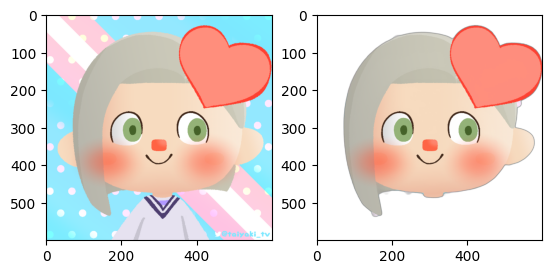

In [5]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(input)

plt.subplot(1,2,2)
plt.imshow(output)